In [82]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [83]:
# Read data
df = pd.read_csv('datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [22]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [24]:
df['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

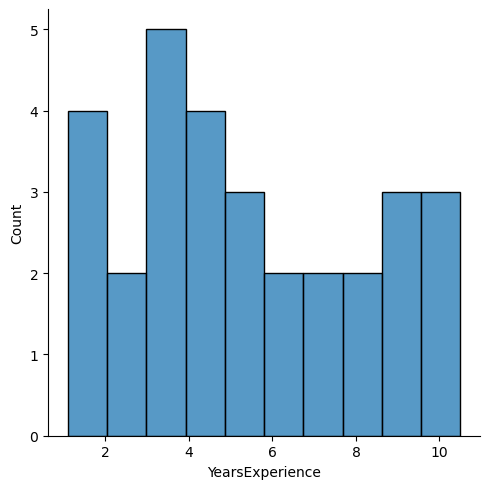

In [37]:
#Visualization of data
sns.displot(df['YearsExperience'], bins = 10);

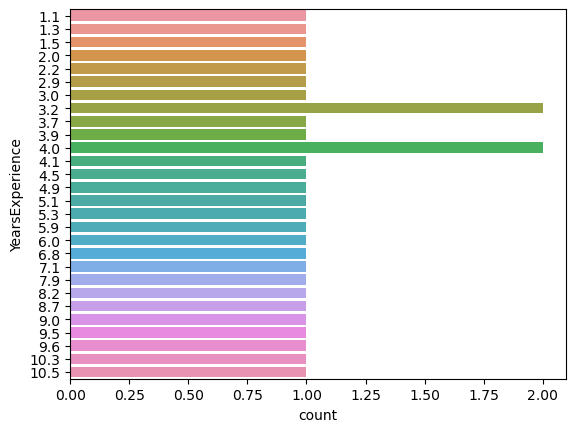

In [40]:
#Visualization of data
sns.countplot(y = 'YearsExperience',data = df);

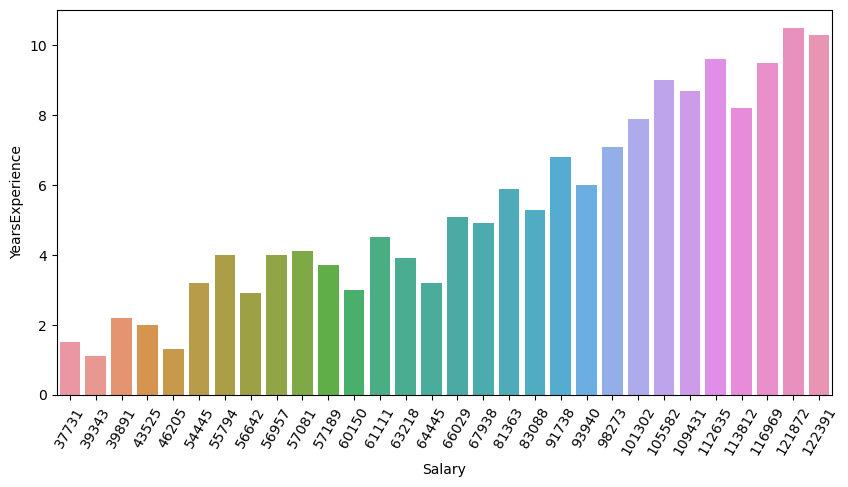

In [47]:
#Visualization of data
plt.figure(figsize = (10,5))
sns.barplot(x = 'Salary', y = 'YearsExperience', data = df)
plt.xticks(rotation = 60);

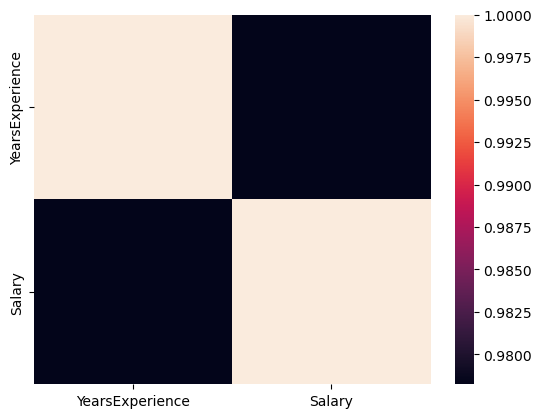

In [49]:
#Visualization of data
sns.heatmap(df.corr());

In [90]:
# Define features (X) and variable answer (y)
X = df.drop('Salary', axis=1) # Independent variable
y = df['Salary'].copy()       # Dependent variable

# Split sets in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Model description
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions in the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 3426.4269374307123
RMSE: 4585.4157204675885
R²: 0.9749154407708353


In [71]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

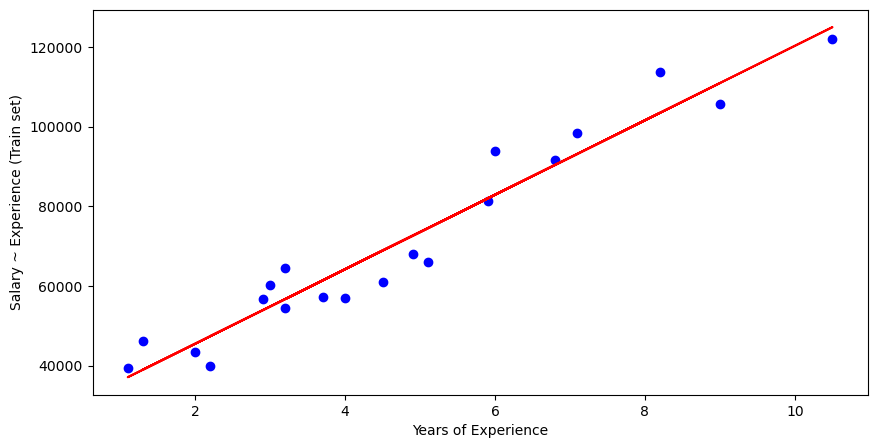

In [80]:
#Visualising Train set result
plt.figure(figsize = (10,5))
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ~ Experience (Train set)');

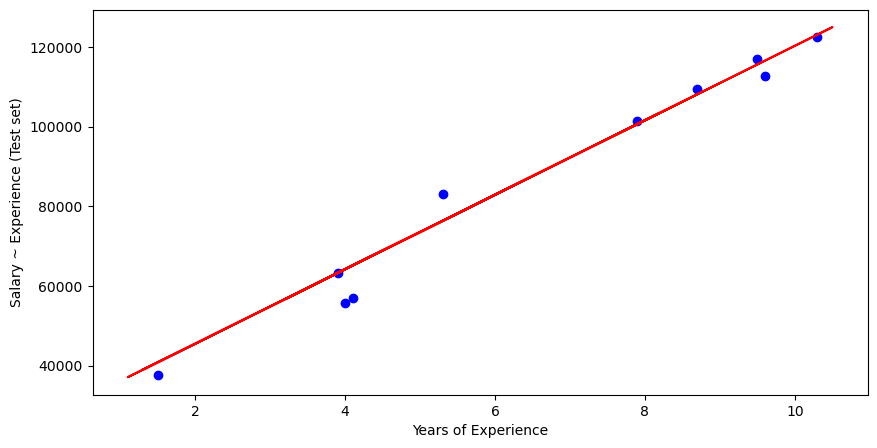

In [93]:
#Visualising Test set result
plt.figure(figsize = (10,5))
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ~ Experience (Test set)');

In [115]:
#Suppose that we have a new data set, named ‘new_data’, that has the same characteristics as the Train set
new_data = [2, 4, 6, 10, 20, 30]  #Year of Experience
df1 = pd.DataFrame(new_data, columns=X_train.columns)

# Use the model to do new predict in this new data set
new_predictions = model.predict(df1)

# Predict
print(new_predictions)


[ 45508.07713028  64199.96201652  82891.84690277 120275.61667525
 213735.04110648 307194.4655377 ]
